In [1]:
import json
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import os
import numpy as np
from src.dataset import get_dataloaders
%matplotlib inline 

In [2]:
config_path = 'config/config.json'
with open(config_path, 'r') as f:
    config = json.load(f)

print("Libraries imported.")
print(f"Data path: {config['data_path']}")
print(f"Config loaded: Batch size {config['batch_size']}, Image size {config['img_size']}")

Libraries imported.
Data path: data/celeba/img_align_celeba/img_align_celeba
Config loaded: Batch size 64, Image size 64


SPLIT      | COUNT      | PERCENT   
-----------------------------------
Train      | 162770     | 80.3%
Valid      | 19867      | 9.8%
Test       | 19962      | 9.9%


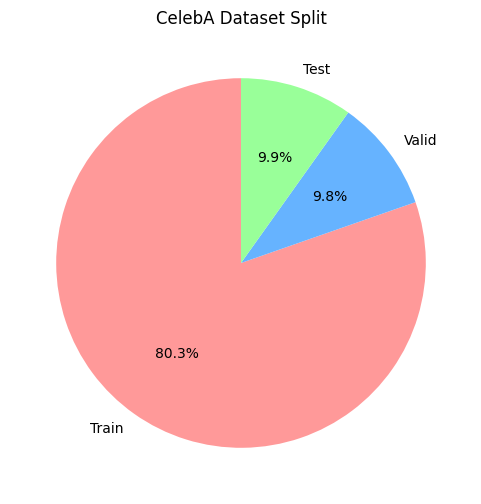

In [3]:
partition_path = config['partition_path']
df_part = pd.read_csv(partition_path)

counts = df_part['partition'].value_counts().sort_index()
split_names = {0: 'Train', 1: 'Valid', 2: 'Test'}

print(f"{'SPLIT':<10} | {'COUNT':<10} | {'PERCENT':<10}")
print("-" * 35)

total_images = len(df_part)
for pid, count in counts.items():
    percent = (count / total_images) * 100
    print(f"{split_names[pid]:<10} | {count:<10} | {percent:.1f}%")

plt.figure(figsize=(6, 6))
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(counts, labels=[split_names[i] for i in counts.index], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("CelebA Dataset Split")
plt.show()

Loading data...
Batch Shape: torch.Size([64, 3, 64, 64]) (Batch, Channels, Height, Width)
Min Pixel Value: 0.0000
Max Pixel Value: 1.0000
info: Images are properly normalized to [0, 1].


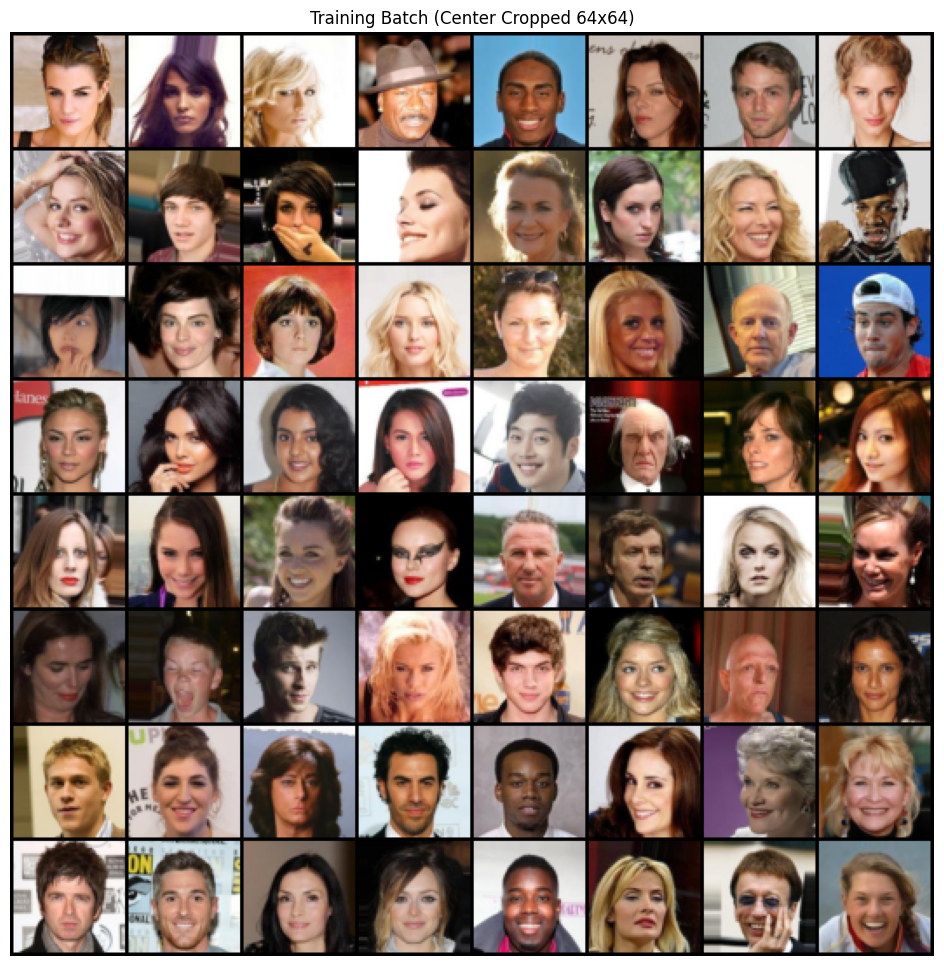

In [4]:
print("Loading data...")
train_loader, _, _ = get_dataloaders(config)

real_batch = next(iter(train_loader))

print(f"Batch Shape: {real_batch.shape} (Batch, Channels, Height, Width)")
print(f"Min Pixel Value: {real_batch.min():.4f}")
print(f"Max Pixel Value: {real_batch.max():.4f}")

if real_batch.max() <= 1.0:
    print("info: Images are properly normalized to [0, 1].")
else:
    print("WARNING: Images are NOT normalized to [0, 1]. Sigmoid activation might fail.")

plt.figure(figsize=(12, 12))
plt.axis("off")
plt.title("Training Batch (Center Cropped 64x64)")

grid_img = vutils.make_grid(real_batch[:64], padding=2, normalize=False)

plt.imshow(np.transpose(grid_img.numpy(), (1, 2, 0)))
plt.show()

Attributes file found. Analyzing...


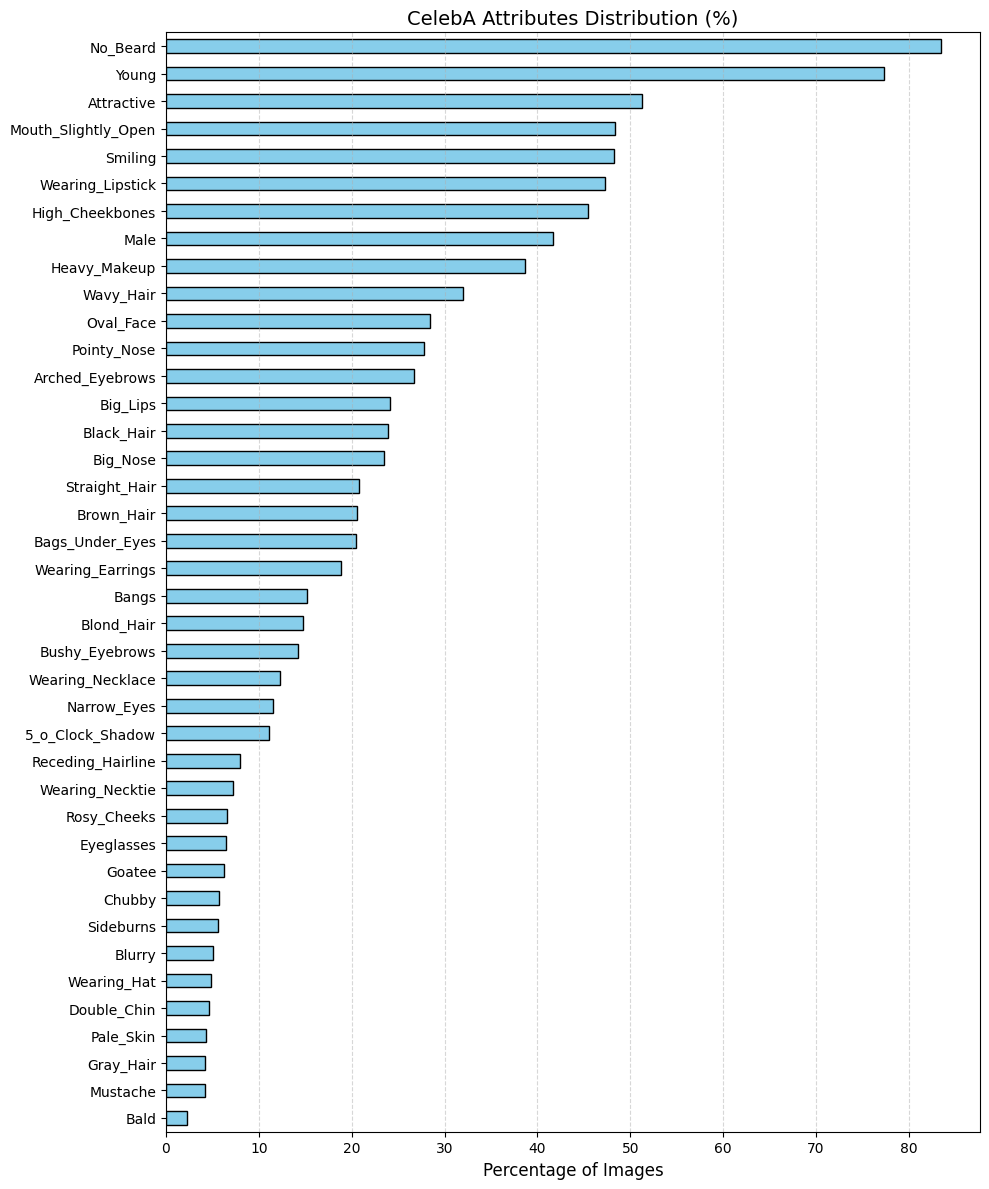

Rarest Attributes (Hard to generate):
Bald           2.244335
Mustache       4.154512
Gray_Hair      4.194986
Pale_Skin      4.294690
Double_Chin    4.668829
dtype: float64

Most Common Attributes:
Smiling                48.208037
Mouth_Slightly_Open    48.342786
Attractive             51.250500
Young                  77.361685
No_Beard               83.493996
dtype: float64


In [5]:
attr_path = r'data/celeba/list_attr_celeba.csv' 

if os.path.exists(attr_path):
    print("Attributes file found. Analyzing...")
    
    df_attr = pd.read_csv(attr_path)
    
    if 'image_id' in df_attr.columns:
        df_attr = df_attr.drop('image_id', axis=1)
    
    df_attr = df_attr.replace(-1, 0)
    
    mean_attrs = df_attr.mean().sort_values(ascending=True) * 100
    
    plt.figure(figsize=(10, 12))
    mean_attrs.plot(kind='barh', color='skyblue', edgecolor='black')
    
    plt.title('CelebA Attributes Distribution (%)', fontsize=14)
    plt.xlabel('Percentage of Images', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    print("Rarest Attributes (Hard to generate):")
    print(mean_attrs.head(5))
    
    print("\nMost Common Attributes:")
    print(mean_attrs.tail(5))
    
else:
    print(f"File not found: {attr_path}")
    print("Please check the path in the code.")